### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Create dataset

In [2]:
import os

path = "train"
c=1
cc="abc"                          #abcdefghijklmnopqrstuvwxyz
classes={}
for i in cc:
    files = os.listdir(path)[:c]
    classes[i]=c
    c+=1
print(classes)
print(files)

{'a': 1, 'b': 2, 'c': 3}
['a', 'b', 'c']


In [3]:
import cv2

X = []
Y = []

for cl in classes:
    pth = path+"/"+cl
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])
print("dataset created successfully!")

dataset created successfully!


In [4]:
pd.Series(Y).value_counts()

2    1000
1    1000
3    1000
dtype: int64

In [5]:
X[0].shape

(28, 28)

In [6]:
print(type(X))
X = np.array(X)
Y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


### Analyze data

1


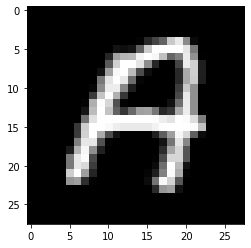

In [7]:
plt.imshow(X[100],cmap="gray")
print(Y[100])

In [8]:
X.shape

(3000, 28, 28)

### Prepare data

In [9]:
X_new = X.reshape(len(X),-1)
print(X_new.shape)
print(Y.shape)

(3000, 784)
(3000,)


In [10]:
28*28

784

In [11]:
print(X.shape)
print(X.ndim)
print(X_new.ndim)

(3000, 28, 28)
3
2


### Split data

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_new,Y, 
                                                test_size=.20, random_state=10)

In [13]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2400, 784) (2400,)
(600, 784) (600,)


### Feature Scaling

In [14]:
print(xtrain.max())
print(xtest.max())
x_train = xtrain/255
x_test = xtest/255
print(x_train.max())
print(x_test.max())

255
255
1.0
1.0


### FEature Selection: PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
print(x_train.shape, x_test.shape)
pca = PCA(.98)
xtrain = pca.fit_transform(x_train)
xtest = pca.transform(x_test)
print(xtrain.shape, xtest.shape)
print(pca.n_components)
print(pca.n_features_)

(2400, 784) (600, 784)
(2400, 178) (600, 178)
0.98
784


In [17]:
ytest[:10]

array([2, 1, 2, 2, 1, 2, 3, 2, 3, 3])

### Train Model

In [18]:
log = LogisticRegression()
log.fit(xtrain, ytrain)

LogisticRegression()

### Prediction

In [19]:
tr_pred = log.predict(xtrain)
ts_pred = log.predict(xtest)

### Evaluation

In [20]:
print("Training Score", accuracy_score(ytrain,tr_pred))      
print("Testing Score", accuracy_score(ytest,ts_pred))        

Training Score 1.0
Testing Score 0.99


2


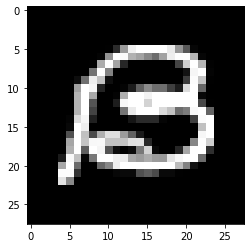

In [21]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
print(ytest[0])

### Test Model

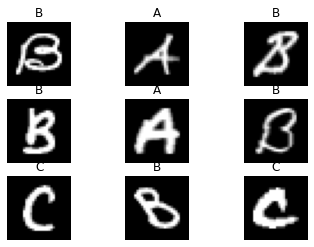

In [22]:
d=1
dd=cc.upper()
decode={}
for j in dd:
    decode[d]=j
    d+=1

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title(decode[ts_pred[i]])
    plt.axis('off')

In [23]:
np.where(ts_pred!=ytest)
d = pd.DataFrame({'Actual':ytest,'Prediction':ts_pred})
d[d['Actual']!=d['Prediction']]

Actual  Prediction
55        2           3
197       1           2
237       2           3
390       2           1
507       2           1
578       1           2

### Test model on real data

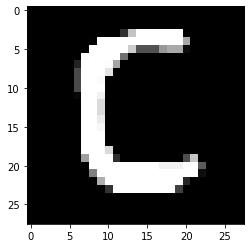

In [24]:
img = cv2.resize(cv2.imread('t.png',0), (28,28))
plt.imshow(img,cmap='gray')

In [25]:
img = pca.transform(img.reshape(1,-1)/255)

In [26]:
decode[log.predict(img)[0]]

'C'

### Save/Export model to a file

In [27]:
import pickle
filename = "model.pkl"
file = open(filename,"wb")
pickle.dump(log, file)
file.close()
fl = open('pca.pkl','wb')
pickle.dump(pca,fl)
fl.close()

### Tkinter GUI

In [28]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import shutil
import pickle
import cv2
import wikipedia

In [29]:
win=tk.Tk()
win.title("Character Recognition System")
win.geometry("800x500")
win.resizable(0,0)
win.config(bg="#f2d968")
l1=tk.Label(win,text="Character Recognition",bg="#f2d968",fg="#ab4505",font=("Garamond",40))
l1.place(x=190,y=10)
l2 = tk.Label(win, text="Upload a Image -",bg="#f2d968",fg="#ab4505",font=("Garamond",20))
l2.place(x=100,y=90)

def UploadFile():
    file_name = filedialog.askopenfilename(initialdir='/', title="Select A File", filetype=(("png","*.png"),("jpg","*.jpg"),("jpeg","*.jpeg")))
    label = tk.Label(win, text="")
    label.place(x=800,y=600)
    img = Image.open(file_name)
    image = ImageTk.PhotoImage(img.resize((120, 160)))
    lbl = tk.Label(win, image=image)
    lbl.image = image
    shutil.copy(file_name, "uploads")
    lbl.place(x=580,y=80)
    l3=tk.Label(win,text="Prediction -",bg="#f2d968",fg="#ab4505",font=("Garamond",40))
    l3.place(x=200,y=150)
    
    f = open("model.pkl",'rb')
    model = pickle.load(f)
    pca = pickle.load(open('pca.pkl','rb'))
    im=cv2.imread(file_name,2)
    tst = pca.transform(cv2.resize(im, (28,28)).reshape(1,-1)/255)
    prediction = decode[model.predict(tst)[0]]
    l4=tk.Label(win,text=prediction,bg="#f2d968",fg="#ab4505",font=("Garamond",40))
    l4.place(x=460,y=150)
    
    l5 = tk.Text(win,font=("Garamond",15),fg="#ab4505",bg="#f5e28c",height=9)
    l5.place(x=39, y=270)

    try:
        page = wikipedia.page(prediction)
        l5.insert(tk.END, page.summary)
    except:
        pass

b1 = tk.Button(win, text="Search",bg="#ed9864",pady=4,padx=18,relief="groove",command=UploadFile)
b1.place(x=310,y=93)
win.mainloop()